In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import datetime

%matplotlib inline

In [46]:
expense = pd.read_csv('expense_txt.csv', 
                      sep='|', 
                      converters = {'Amount': lambda x : float(string.replace(string.replace(x, '$', ''),',',''))}, 
                      parse_dates=['Date'], 
                      date_parser= lambda y : datetime.datetime.strptime(y, '%Y-%m-%d'))


expense.rename(columns={'Regular ?' : 'Regular'}, inplace=True)
expense['mth'] = expense['Date'].apply(lambda x : x.year.__str__() + '-' + x.month.__str__().zfill(2))

expense[:5]

,Date,Category,Item,Amount,Regular,Remark,mth
0,2015-07-14,Domestic,rubbish bin,255.0,N,友誠,2015-07
1,2015-07-25,Domestic,厨紙,34.9,Y,NaN,2015-07
2,2015-07-25,Cook,茄汁,18.9,Y,NaN,2015-07
3,2015-07-25,Cook,生抽,10.9,Y,NaN,2015-07
4,2015-07-25,Domestic,即棄餐具,19.8,N,NaN,2015-07


In [47]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 7 columns):
Date        1127 non-null datetime64[ns]
Category    1127 non-null object
Item        1127 non-null object
Amount      1127 non-null float64
Regular     1126 non-null object
Remark      879 non-null object
mth         1127 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 48.4+ KB


In [48]:
expense.describe()

,Amount
count,1127.000000
mean,381.167285
std,1563.120253
min,2.000000
25%,24.500000
50%,43.500000
75%,127.000000
max,20000.000000


In [49]:
expense[expense.Category == 'Jinny'].head(10)

,Date,Category,Item,Amount,Regular,Remark,mth
9,2015-07-26,Jinny,奶粉,299,Y,NaN,2015-07
62,2015-08-06,Jinny,奶粉,299,Y,NaN,2015-08
68,2015-08-07,Jinny,尿片,1300,Y,and 洗奶樽 / 思思樂,2015-08
69,2015-08-07,Jinny,奶樽,178,N,Doctor Brown x 2,2015-08
70,2015-08-07,Jinny,鞋,92,N,Hello Kitty,2015-08
71,2015-08-07,Jinny,Cook book,98,N,Hilda,2015-08
88,2015-08-10,Jinny,奶樽,190,N,David helped,2015-08
145,2015-08-19,Jinny,百日宴,1800,N,訂,2015-08
155,2015-08-22,Jinny,Clothes,591,Y,Chickeduck,2015-08
159,2015-08-23,Jinny,奶粉,299,Y,NaN,2015-08


In [50]:
expense[(expense.Date >= '2016-01-01') & (expense.Date < '2016-02-01')].head(10)

,Date,Category,Item,Amount,Regular,Remark,mth
912,2016-01-01,Bill,Meifoo,1096.0,Y,NaN,2016-01
921,2016-01-01,Cook,買餸,14.9,Y,ParkNShop,2016-01
922,2016-01-01,Meal,Lunch,124.0,Y,NaN,2016-01
923,2016-01-01,Misc,Bakery,148.0,Y,NaN,2016-01
924,2016-01-02,Jinny,奶粉,22.0,N,順豐,2016-01
925,2016-01-02,Cook,Drink,11.5,Y,NaN,2016-01
926,2016-01-02,Meal,Dinner,124.0,Y,太興,2016-01
927,2016-01-02,DanSan,拖鞋,14.9,N,日本城,2016-01
928,2016-01-03,Drive,Toll,40.0,Y,紅隧,2016-01
929,2016-01-03,Meal,Lunch,195.0,Y,太平街,2016-01


In [53]:
expense[(expense.Date >= '2016-01-01') & (expense.Date < '2016-02-01')].groupby(['Category']).sum()

,Amount
Category,
Bill,14431.00
Cook,3348.80
DanSan,14.90
Domestic,13880.24
Drive,659.00
Jinny,2225.00
Leisure,144.00
Meal,5699.50
Misc,2307.30


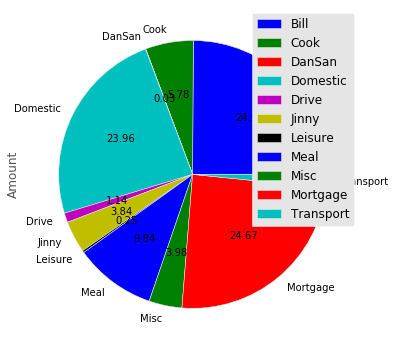

In [63]:
expense[(expense.Date >= '2016-01-01') & (expense.Date < '2016-02-01')].groupby(['Category']).sum().plot(
    kind='pie', 
    y='Amount', 
    autopct='%.2f',
    figsize=(6, 6))

In [35]:
expense.groupby('mth').sum()

,Amount
mth,
2015-07,28625.10
2015-08,72285.00
2015-09,63710.40
2015-10,90043.79
2015-11,56029.50
2015-12,59012.60
2016-01,57927.14
2016-02,1942.00


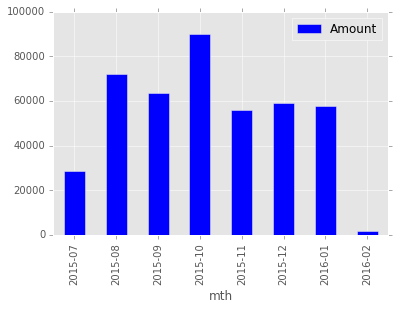

In [64]:
expense.groupby('mth').sum().plot(kind='bar')

In [36]:
expense[expense.Regular == 'Y'].groupby('mth').sum()

,Amount
mth,
2015-07,27957.50
2015-08,41076.00
2015-09,43678.00
2015-10,50851.89
2015-11,43647.40
2015-12,52850.30
2016-01,45315.14
2016-02,1942.00


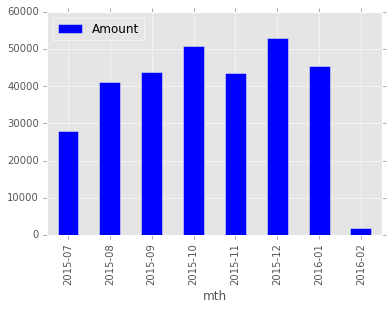

In [42]:
expense[expense.Regular == 'Y'].groupby('mth').sum().plot(kind='bar')

In [37]:
expense.groupby('mth').sum().mean()

Amount    53696.94125
dtype: float64

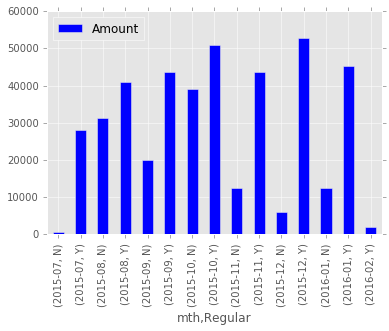

In [45]:
expense.groupby(['mth', 'Regular']).sum().plot(kind='bar')

In [41]:
# expense.groupby([lambda x : x.year.__str__() + '-' + x.month.__str__(), 'Category']).sum()